# Shapley Analysis
This step uses the shap package by Lundberg et al. to generate global and local variable contribution graphs. These graphs are then used for generating domain analysis or for inspecting correctness of model learning outcomes. 

In [12]:
import pickle
import shap
import matplotlib.pyplot as plt
import pandas as pd

shap.initjs()
import warnings
warnings.filterwarnings("ignore")

In [40]:
def draw_global(path, title):
    DATA_PATH = path

    repo = DATA_PATH+f"/test/"

    file_name = repo+"smote_xgb_0_special.pkl"

    with open(file_name, "rb") as f:
        result = pickle.load(f)
        model_train_x = result["x_train"]
        y_train_true = result["y_train"]
    with open(repo+f"smote_xgb_{0}_special_clf.pkl", "rb") as f:
        model = pickle.load(f)

    explainer = shap.Explainer(model)
    shap_values = explainer(model_train_x)[:, :]

    shap.plots.beeswarm(shap_values, max_display=100, show=False)
    fig, ax = plt.gcf(), plt.gca()

    ax.set_ylabel("Variable value")
    plt.title(title)
    plt.show()
    return shap_values

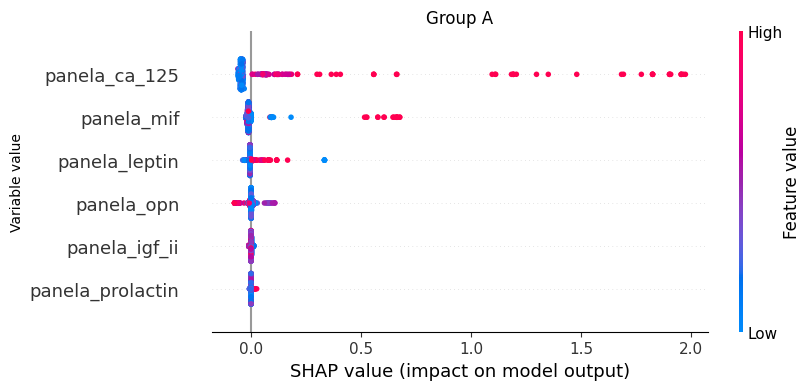

In [41]:
# Group A
shap_values_a = draw_global("../../results/plco/correct_pipeline/no_over/shap_original_A", "Group A")

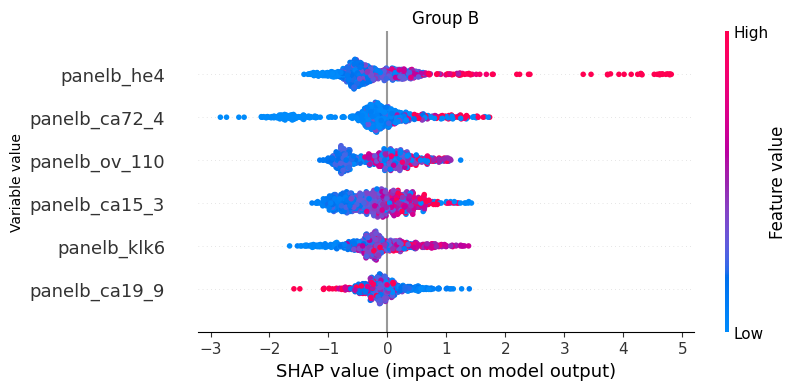

In [37]:
# Group B
draw_global("../../results/plco/correct_pipeline/no_over/shap_original_B", "Group B")

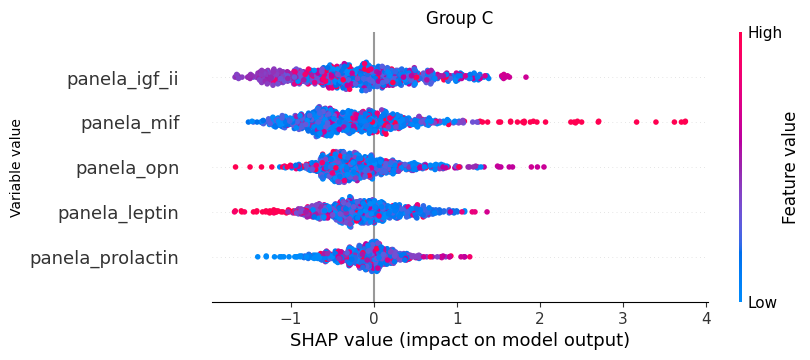

In [38]:
# Group C
draw_global("../../results/plco/correct_pipeline/no_over/shap_original_C", "Group C")

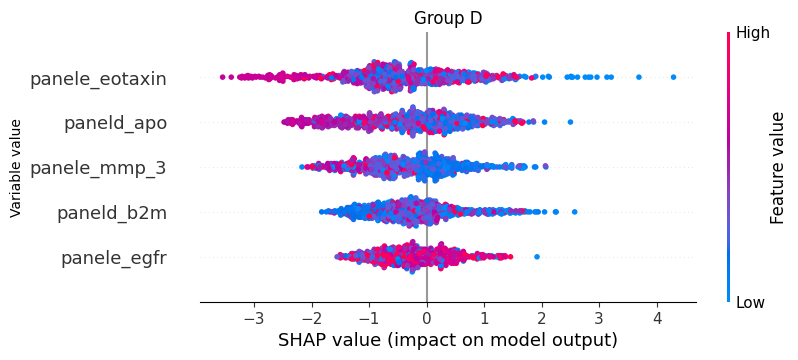

In [39]:
# Group D
draw_global("../../results/plco/correct_pipeline/no_over/shap_original_D", "Group D")

In [62]:
shap_values_a.values[shap_values_a.values[:, 0].argmax(), :]

array([ 3.3382195e-01,  1.7682720e-04,  8.5684024e-03, -5.5555266e-04,
       -1.0777654e-02, -4.5576192e-02], dtype=float32)

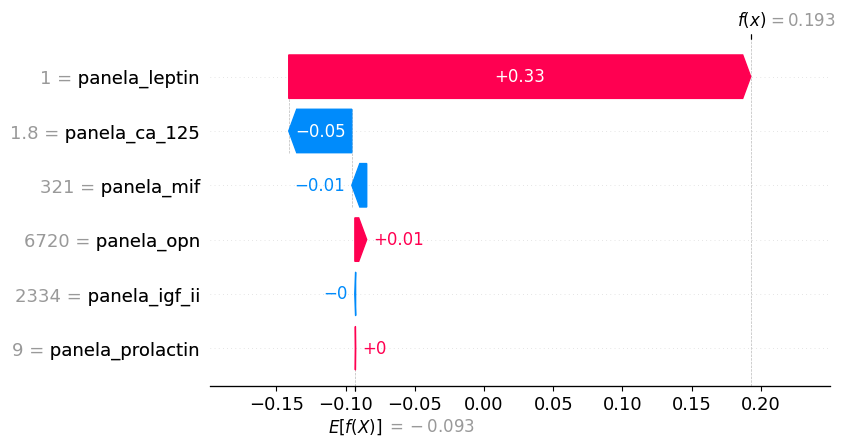

In [61]:
shap.plots.waterfall(shap_values_a[656])